<a href="https://colab.research.google.com/github/afifibd/Machine-Learning/blob/main/UTS/UTS_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Afif Ibadurrahman J

NIM : 1103210221

Lecture : UTS Machine Learning

Dataset : [Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

Model : Random Forest

# **Import Library**

In [16]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Load Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_train = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')

data_train.head()

<ipython-input-4-eb4984ec7be0>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# **Pre Processing Data**

Mengecek apakah ada data yang kosong

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### **Pembersihan data**

**Menyesuaikan format data**

In [8]:
#Kolom : Age / Num_of_Loan / Num_of_Delayed_Payment
data_train['Age'] = data_train['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
data_train['Num_of_Loan'] = data_train['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
data_train['Num_of_Delayed_Payment'] = data_train['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int)

#Kolom : Annual_Income
data_train['Annual_Income'] = data_train['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
data_train['Annual_Income'] = data_train['Annual_Income'].astype(float)

#Kolom : Changed_Credit_Limit
data_train['Changed_Credit_Limit'] = data_train['Changed_Credit_Limit'].replace('_', np.nan)
data_train['Changed_Credit_Limit'] = pd.to_numeric(data_train['Changed_Credit_Limit'], errors='coerce')
data_train['Changed_Credit_Limit'] = data_train['Changed_Credit_Limit'].fillna(0)

#Kolom : Outstanding_Debt
data_train['Outstanding_Debt'] = data_train['Outstanding_Debt'].astype(str)
data_train['Outstanding_Debt'] = data_train['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
data_train['Outstanding_Debt'] = pd.to_numeric(data_train['Outstanding_Debt'], errors='coerce')
data_train['Outstanding_Debt'] = data_train['Outstanding_Debt'].fillna(0)

#Kolom : Amount_invested_monthly
data_train['Amount_invested_monthly'] = data_train['Amount_invested_monthly'].astype(str)
data_train['Amount_invested_monthly'] = data_train['Amount_invested_monthly'].replace('', '0')
data_train['Amount_invested_monthly'] = data_train['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
data_train['Amount_invested_monthly'] = pd.to_numeric(data_train['Amount_invested_monthly'], errors='coerce')
data_train['Amount_invested_monthly'] = data_train['Amount_invested_monthly'].fillna(0)

#Kolom : Monthly_Balance
data_train['Monthly_Balance'] = data_train['Monthly_Balance'].astype(str)
data_train['Monthly_Balance'] = data_train['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
data_train['Monthly_Balance'] = pd.to_numeric(data_train['Monthly_Balance'], errors='coerce')
data_train['Monthly_Balance'] = data_train['Monthly_Balance'].fillna(0)

#Kolom : Credit History Age
def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0'
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0

data_train['Credit_History_Age_Months'] = data_train['Credit_History_Age'].apply(parse_years_and_months)

**Menghilangkan duplikasi dan dilakukan pengecekan**

In [10]:
# Metode menghilangkan duplikasi
duplikat = data_train[data_train.duplicated()]

# Menghitung jumlah baris yang merupakan duplikat
jumlah_duplikat = duplikat.shape[0]

# Pengecekan
if jumlah_duplikat == 0:
    print("Tidak ditemukan duplikat")
else:
    print("Ada", jumlah_duplikat, "duplikat.")

Tidak ditemukan duplikat


**Data Scaling**

In [13]:
# Menampilkan ringkasan statistik deskriptif untuk setiap kolom dalam DataFrame,
# lalu melakukan transposisi agar kolom-kolom menjadi baris-baris dan sebaliknya.
# Ini membantu dalam membaca dan membandingkan data.
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,119.509700,6.847573e+02,14.000000,25.000000,34.000000,42.000000,8.698000e+03
Annual_Income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4194.170850,3.183686e+03,303.645417,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,17.091280,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,10.761960,6.178993e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,28.779410,2.181148e+02,0.000000,8.000000,13.000000,18.000000,4.397000e+03
Changed_Credit_Limit,100000.0,10.171791,6.880628e+00,-6.490000,4.970000,9.250000,14.660000,3.697000e+01


In [18]:
# Inisialisasi objek scaler
scaler = MinMaxScaler()

# Kolom-kolom yang ingin di-scaling
columns_to_scale = ['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income',
                    'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
                    'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']

# Lakukan scaling pada kolom-kolom tersebut
data_train[columns_to_scale] = scaler.fit_transform(data_train[columns_to_scale])

In [19]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,119.509700,684.757313,14.000000,25.000000,34.000000,42.000000,8698.000000
Annual_Income,100000.0,0.007003,0.059097,0.000000,0.000515,0.001264,0.002719,1.000000
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,0.010056,0.065261,0.000000,0.002223,0.003891,0.004447,1.000000
Num_Credit_Card,100000.0,0.014993,0.086096,0.000000,0.002668,0.003336,0.004670,1.000000
Interest_Rate,100000.0,0.012330,0.080473,0.000000,0.001208,0.002070,0.003278,1.000000
Num_of_Loan,100000.0,0.007194,0.041303,0.000000,0.001337,0.002005,0.004011,1.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,0.006545,0.049605,0.000000,0.001819,0.002957,0.004094,1.000000
Changed_Credit_Limit,100000.0,10.171791,6.880628,-6.490000,4.970000,9.250000,14.660000,36.970000


**Data Entry Plus**

Filtering

In [21]:
data_train = data_train[data_train['Payment_Behaviour'] != '!@9#%8'] # Untuk menghilangkan '!@9#%8' pada kolom Payment_Behaviour

In [23]:
data_train = data_train[data_train['Occupation'] != '_______'] # Untuk menghilangkan '_______' pada kolom Occupation

print(data_train['Occupation'].unique()) # Mencetak nilai unik dari kolom Occupation setelah menghilangkan nilai

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [24]:
data_train = data_train[data_train['Credit_Mix'] != '_'] # Untuk menghilangkan '_' pada Credit_Mix
print(data_train['Credit_Mix'].unique()) # Mencetak nilai unik pada kolom Credit_Mix

['Good' 'Standard' 'Bad']


Menghilangkan nilai yang minus

In [25]:
# Memilih kolom-kolom tertentu yang akan diperiksa
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

# Melakukan penghapusan baris dengan nilai negatif pada setiap kolom yang dipilih
for column in selected_columns:
    data_train = data_train[data_train[column] >= 0]  # Menyaring baris dengan nilai non-negatif dalam kolom tertentu

Drop Kolom

In [26]:
# Daftar kolom yang akan dihapus dari DataFrame
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age',
                   'Monthly_Inhand_Salary', 'Type_of_Loan']

# Menghapus kolom-kolom yang ada dalam daftar `columns_to_drop` dari DataFrame `train`
data_train.drop(columns=columns_to_drop, inplace=True)

**Missing Values**

In [27]:
# Menghapus baris-baris yang mengandung nilai yang hilang (missing value) dari DataFrame `data_train`
data_train.dropna(inplace=True)

# Mengatur ulang indeks baris DataFrame `data_train` agar berurutan setelah penghapusan baris dengan nilai yang hilang
data_train.reset_index(drop=True, inplace=True)

In [28]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65710 entries, 0 to 65709
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        65710 non-null  int64  
 1   Occupation                 65710 non-null  object 
 2   Annual_Income              65710 non-null  float64
 3   Num_Bank_Accounts          65710 non-null  float64
 4   Num_Credit_Card            65710 non-null  float64
 5   Interest_Rate              65710 non-null  float64
 6   Num_of_Loan                65710 non-null  float64
 7   Delay_from_due_date        65710 non-null  int64  
 8   Num_of_Delayed_Payment     65710 non-null  float64
 9   Changed_Credit_Limit       65710 non-null  float64
 10  Num_Credit_Inquiries       65710 non-null  float64
 11  Credit_Mix                 65710 non-null  object 
 12  Outstanding_Debt           65710 non-null  float64
 13  Credit_Utilization_Ratio   65710 non-null  flo

In [31]:
# Menghitung jumlah total nilai yang hilang (missing values) dalam DataFrame `data_train`
total_missing_values = data_train.isnull().sum().sum()

# Memeriksa apakah jumlah total nilai yang hilang adalah 0
if total_missing_values == 0:
    print("Tidak ada data kosong")
else:
    # Jika ada nilai yang hilang, cetak total nilai yang hilang
    print("Total missing values:", total_missing_values)


Tidak ada data kosong


# **Feature Engineering**

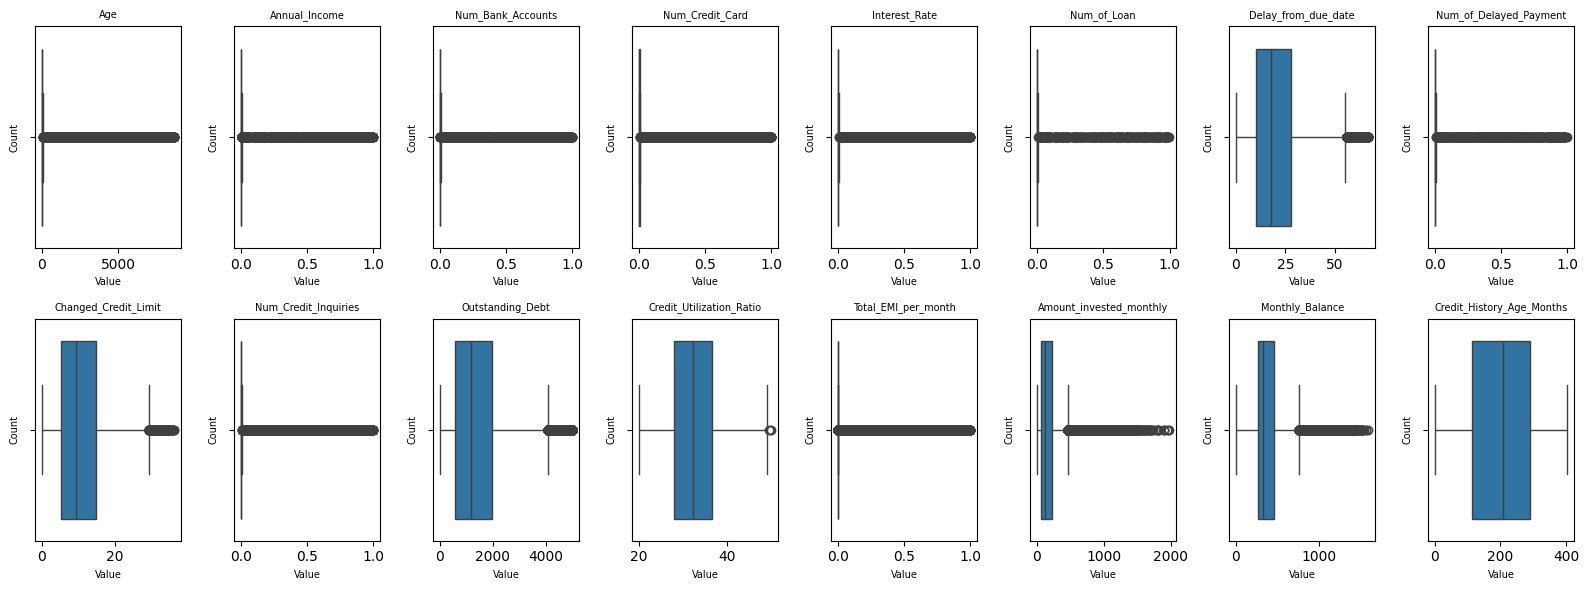

In [32]:
# Memilih kolom-kolom numerik dari DataFrame `data_train`
numeric_columns = data_train.select_dtypes(include=['int64', 'float64']).columns

# Menentukan jumlah kolom dan baris untuk subplots
num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

# Membuat subplots dengan ukuran sesuai dengan jumlah kolom dan baris yang ditentukan
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

# Meratakan array dari subplots menjadi satu dimensi
axes = axes.flatten()

# Iterasi melalui setiap kolom numerik dan membuat boxplot untuk setiap kolom
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=data_train[column], ax=axes[i])  # Membuat boxplot
    axes[i].set_title(column, fontsize=7)  # Memberi judul pada boxplot
    axes[i].set_xlabel('Value', fontsize=7)  # Memberi label pada sumbu x
    axes[i].set_ylabel('Count', fontsize=7)  # Memberi label pada sumbu y

# Menyembunyikan subplot yang tidak terpakai (jika ada)
for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

# Mengatur layout subplot agar rapi
plt.tight_layout()

# Menampilkan plot
plt.show()


**Scaling**

In [35]:
# Tune kolom
data_train = data_train[data_train['Age'] < 60]
data_train = data_train[data_train['Num_Credit_Card'] <= 10]
data_train = data_train[data_train['Interest_Rate'] <= 50]
data_train = data_train[data_train['Num_of_Loan'] <= 12]
data_train = data_train[data_train['Num_Bank_Accounts'] <= 10]
data_train = data_train[data_train['Delay_from_due_date'] <= 60]
data_train = data_train[data_train['Changed_Credit_Limit'] <= 30]
data_train = data_train[data_train['Num_Credit_Inquiries'] <= 12]
data_train = data_train[data_train['Total_EMI_per_month'] <= 200]
data_train = data_train[data_train['Outstanding_Debt'] <= 1500]

Kode di atas bertujuan untuk melakukan "tuning" atau penyetelan terhadap nilai-nilai pada beberapa kolom dalam DataFrame `data_train`. Setiap baris dalam DataFrame `data_train` akan disaring berdasarkan kriteria-kriteria yang ditetapkan untuk masing-masing kolom yang ditunjukkan. Berikut adalah penjelasan singkat untuk setiap baris kode:

1. **Age (Usia)**: Hanya menyertakan baris dengan nilai usia di bawah 60 tahun.
2. **Num_Credit_Card (Jumlah Kartu Kredit)**: Hanya menyertakan baris dengan nilai jumlah kartu kredit yang kurang dari atau sama dengan 10.
3. **Interest_Rate (Tingkat Bunga)**: Hanya menyertakan baris dengan nilai tingkat bunga yang kurang dari atau sama dengan 50.
4. **Num_of_Loan (Jumlah Pinjaman)**: Hanya menyertakan baris dengan nilai jumlah pinjaman yang kurang dari atau sama dengan 12.
5. **Num_Bank_Accounts (Jumlah Rekening Bank)**: Hanya menyertakan baris dengan nilai jumlah rekening bank yang kurang dari atau sama dengan 10.
6. **Delay_from_due_date (Keterlambatan dari Tanggal Jatuh Tempo)**: Hanya menyertakan baris dengan nilai keterlambatan yang kurang dari atau sama dengan 60.
7. **Changed_Credit_Limit (Perubahan Batas Kredit)**: Hanya menyertakan baris dengan nilai perubahan batas kredit yang kurang dari atau sama dengan 30.
8. **Num_Credit_Inquiries (Jumlah Pertanyaan Kredit)**: Hanya menyertakan baris dengan nilai jumlah pertanyaan kredit yang kurang dari atau sama dengan 12.
9. **Total_EMI_per_month (Total Cicilan per Bulan)**: Hanya menyertakan baris dengan nilai total cicilan per bulan yang kurang dari atau sama dengan 200.
10. **Outstanding_Debt (Utang yang Belum Lunas)**: Hanya menyertakan baris dengan nilai utang yang belum lunas yang kurang dari atau sama dengan 1500.

Dengan melakukan penyetelan seperti ini, kita dapat menyaring dataset dan mempertahankan baris-baris yang memenuhi kriteria tertentu pada setiap kolom yang ditentukan.

**Encoding**

Label Encoder

In [36]:
categories = ['Poor', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

data_train['Credit_Score_Encoded'] = encoder.fit_transform(data_train[['Credit_Score']])

In [37]:
# Encode Occupation

label_encoder = LabelEncoder()
data_train['Occupation_Encoded'] = label_encoder.fit_transform(data_train['Occupation'])

Ordinal Encoder

In [38]:
categories = ['Bad', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

data_train['Credit_Mix_Encoded'] = encoder.fit_transform(data_train[['Credit_Mix']])

In [40]:
categories_payment_behaviour = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

data_train['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(data_train[['Payment_Behaviour']])

Drop kolom yang sudah di encode

In [41]:
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
data_train.drop(columns=columns_to_drop, inplace=True)

**Fitur baru untuk mengurangi error**

In [43]:
# Menghitung jumlah akun (Bank Accounts + Credit Cards)

data_train['Total_Num_Accounts'] = data_train['Num_Bank_Accounts'] + data_train['Num_Credit_Card']

# Mengitung jumlah hutang per akun

data_train['Debt_Per_Account'] = data_train['Outstanding_Debt'] / data_train['Total_Num_Accounts']

# Menghitung perbandingan hutang dengan pemasukan

data_train['Debt_to_Income_Ratio'] = data_train['Outstanding_Debt'] / data_train['Annual_Income']

# Menghitung jumlah delayed payment per akun

data_train['Delayed_Payments_Per_Account'] = data_train['Num_of_Delayed_Payment'] / data_train['Total_Num_Accounts']

# Menghitung pengeluaran bulanan (EMI + Monthly Investments)

data_train['Total_Monthly_Expenses'] = data_train['Total_EMI_per_month'] + data_train['Amount_invested_monthly']

**Mutual Information Scores**

In [44]:
categorical_columns = data_train.select_dtypes(include=['object']).columns

data_encoded = data_train.copy()

encoder = OrdinalEncoder()
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

mi_scores = mutual_info_classif(X, y)

for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

Feature 'Age': Mutual Information Score = 0.005757027256720226
Feature 'Annual_Income': Mutual Information Score = 0.4767531985688489
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.058219859759724324
Feature 'Num_Credit_Card': Mutual Information Score = 0.06675463078419419
Feature 'Interest_Rate': Mutual Information Score = 0.10012305875969174
Feature 'Num_of_Loan': Mutual Information Score = 0.020754868834320206
Feature 'Delay_from_due_date': Mutual Information Score = 0.06649450515506494
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.048592563946899814
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.09576695284491699
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.03508640990741907
Feature 'Outstanding_Debt': Mutual Information Score = 0.48062605645365397
Feature 'Credit_Utilization_Ratio': Mutual Information Score = 0.0
Feature 'Payment_of_Min_Amount': Mutual Information Score = 0.07127540238269381
Feature 'Total_EMI_per_month': M

In [48]:
sorted_mi_scores = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_mi_scores]
sorted_scores = [x[1] for x in sorted_mi_scores]

colorscale = 'Viridis'

fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Mutual Information Score', len=0.5, y=0.2)))])

fig.update_layout(title='Mutual Information Scores (MI Score)',
                  xaxis_title='Features',
                  yaxis_title='Mutual Information Score')

fig.show()

# **Model Data**

In [50]:
y = data_train['Credit_Score_Encoded']

X = data_train[['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
       'Credit_History_Age_Months', 'Credit_Mix_Encoded', 'Total_Num_Accounts',
       'Debt_Per_Account', 'Debt_to_Income_Ratio', 'Delayed_Payments_Per_Account']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

**Random Forest**

In [52]:
model = RandomForestRegressor(n_estimators=500, bootstrap=True, random_state=77)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=77)

**MSE**

In [53]:
# Hitung MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1674288451058621


**Accuracy**

In [54]:
rf_classifier = RandomForestClassifier(n_estimators=500, bootstrap=True)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

Accuracy on original test set: 0.7965533194540828

Classification report for original test set:
               precision    recall  f1-score   support

         0.0       0.76      0.65      0.70      1198
         1.0       0.82      0.86      0.84      5233
         2.0       0.75      0.73      0.74      2215

    accuracy                           0.80      8646
   macro avg       0.78      0.75      0.76      8646
weighted avg       0.79      0.80      0.79      8646



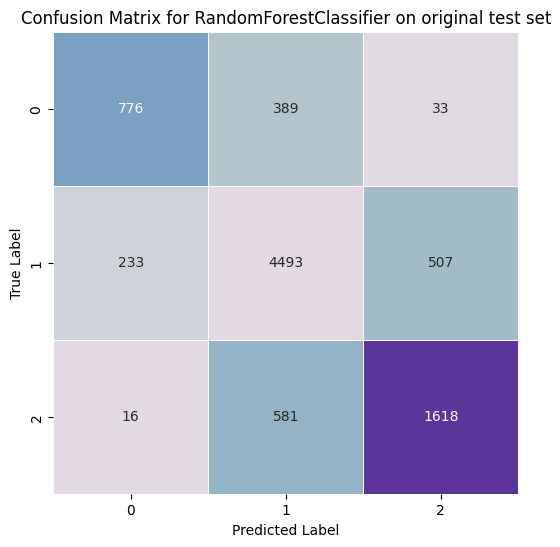

In [55]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on original test set:", accuracy)

matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, cbar=False, cmap='twilight', linewidth=0.5, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for RandomForestClassifier on original test set')

print('\nClassification report for original test set:\n', classification_report(y_test, y_pred))